In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
Wine = pd.read_csv('../datafiles/wine/wine.csv', sep=',')
Wine = Wine.dropna(how="all")

In [4]:
Wine.tail()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [5]:
Wine.info()
Wine.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [6]:
bins = (0, 3.1, 5.0, 7.1, 20)
group_names = ['light', 'moderately light', 'moderately intense', 'intense']
Wine['Color intensity'] = pd.cut(Wine['Color intensity'], bins = bins, labels= group_names)

<AxesSubplot:xlabel='Color intensity', ylabel='count'>

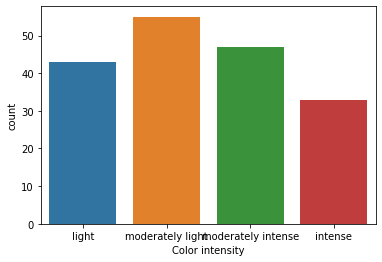

In [7]:
sns.countplot(x=Wine['Color intensity'])

In [7]:
Wine['Color intensity'].unique()

['moderately intense', 'moderately light', 'intense', 'light']
Categories (4, object): ['light' < 'moderately light' < 'moderately intense' < 'intense']

In [8]:
label_color_intensity = preprocessing.LabelEncoder()
intensity = label_color_intensity.fit_transform(list(Wine['Color intensity']))
intensity_names = ['light', 'moderately light', 'moderately intense', 'intense']

In [9]:
X = list(zip(list(Wine["Class"]),
list(Wine["Alcohol"]),
list(Wine["Malic acid"]),
list(Wine["Ash"]),
list(Wine["Alcalinity of ash"]),
list(Wine["Magnesium"]),
list(Wine["Total phenols"]),
list(Wine["Flavanoids"]),
list(Wine["Nonflavanoid phenols"]),
list(Wine["Proanthocyanins"]),
list(Wine["Hue"]),
list(Wine["OD280/OD315 of diluted wines"]),
list(Wine["Proline"])))

y = list(intensity)

In [10]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.35)

In [11]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
acc = model.score(X_test, y_test)
acc

0.3333333333333333

In [12]:
y_prediction = model.predict(X_test)

In [13]:
for x in range(len(y_prediction)):
    print('Predicted:', intensity_names[y_prediction[x]], 'Actual:', intensity_names[y_test[x]])

Predicted: light Actual: moderately light
Predicted: light Actual: light
Predicted: moderately intense Actual: moderately intense
Predicted: light Actual: light
Predicted: moderately intense Actual: moderately intense
Predicted: moderately intense Actual: intense
Predicted: light Actual: moderately intense
Predicted: moderately light Actual: moderately light
Predicted: light Actual: moderately intense
Predicted: light Actual: moderately intense
Predicted: light Actual: moderately light
Predicted: light Actual: intense
Predicted: light Actual: moderately light
Predicted: light Actual: moderately light
Predicted: light Actual: intense
Predicted: light Actual: light
Predicted: moderately light Actual: moderately intense
Predicted: light Actual: moderately light
Predicted: intense Actual: intense
Predicted: moderately intense Actual: moderately intense
Predicted: light Actual: intense
Predicted: intense Actual: intense
Predicted: light Actual: intense
Predicted: moderately light Actual: in

In [14]:
print(classification_report(y_test, y_prediction))
print(confusion_matrix(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.23      0.67      0.34         9
           1       0.38      0.50      0.43        12
           2       0.42      0.29      0.34        17
           3       0.44      0.16      0.24        25

    accuracy                           0.33        63
   macro avg       0.37      0.41      0.34        63
weighted avg       0.39      0.33      0.32        63

[[6 0 1 2]
 [5 6 0 1]
 [7 3 5 2]
 [8 7 6 4]]


As we can see, the prediction is fairly inaccurate. However, what if we base the prediction of color intensity, excluding unimportant factors, such as "Class"? Let's check.

What Google tells us:

The intensity of color can be observed with the wine’s opacity. Deeply opaque red wines have been noted for having more pigment and phenolics than more translucent red wines. For example, Syrah has as much as 4 times more pigment (antioxidants) than Zinfandel. There are a few features you can observe that are generally true with color intensity:

- Different grape varieties have different levels of intensity. For example, Gamay is very low and Pinotage has exceptionally high levels of pigmentation.
- Color intensity can be amplified by other polyphenols (e.g. tannin) in wine. Thus, wines that are more opaque may also contain higher levels of tannin.
- The pigment in red wine is sensitive to both temperature and sulfites. Wines that are fermented at high temperatures or have higher sulfur additions will have less color intensity.
- Wines lose pigment as they age. As much as 85% of the anthocyanin is lost after 5 years

In [15]:
X_new = list(zip(
list(Wine["Malic acid"]),
list(Wine["Magnesium"]),
list(Wine["Total phenols"]),
list(Wine["Flavanoids"]),
list(Wine["Nonflavanoid phenols"]),
list(Wine["Proanthocyanins"]),
list(Wine["Hue"]
)))

In [16]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_new, y, test_size=0.35)

In [17]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
acc = model.score(X_test, y_test)
acc

0.38095238095238093

In [18]:
y_prediction = model.predict(X_test)

In [19]:
for x in range(len(y_prediction)):
    print('Predicted:', intensity_names[y_prediction[x]], 'Actual:', intensity_names[y_test[x]])

Predicted: moderately intense Actual: moderately intense
Predicted: intense Actual: light
Predicted: moderately intense Actual: intense
Predicted: moderately intense Actual: light
Predicted: intense Actual: moderately light
Predicted: intense Actual: light
Predicted: intense Actual: intense
Predicted: intense Actual: moderately light
Predicted: light Actual: moderately intense
Predicted: moderately intense Actual: light
Predicted: light Actual: moderately intense
Predicted: moderately light Actual: moderately intense
Predicted: moderately light Actual: intense
Predicted: light Actual: intense
Predicted: moderately intense Actual: moderately intense
Predicted: intense Actual: intense
Predicted: light Actual: moderately light
Predicted: intense Actual: intense
Predicted: intense Actual: intense
Predicted: intense Actual: moderately light
Predicted: light Actual: intense
Predicted: intense Actual: intense
Predicted: moderately intense Actual: light
Predicted: light Actual: light
Predicted

In [20]:
print(classification_report(y_test, y_prediction))
print(confusion_matrix(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.24      0.31      0.27        13
           1       0.43      0.40      0.41        15
           2       0.44      0.44      0.44        16
           3       0.44      0.37      0.40        19

    accuracy                           0.38        63
   macro avg       0.38      0.38      0.38        63
weighted avg       0.39      0.38      0.39        63

[[4 1 5 3]
 [4 6 0 5]
 [7 1 7 1]
 [2 6 4 7]]


What if we set training set to take 20% of whole dataset?

In [21]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_new, y, test_size=0.2)
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
acc = model.score(X_test, y_test)
acc

0.5

In [22]:
y_prediction = model.predict(X_test)
print(classification_report(y_test, y_prediction))
print(confusion_matrix(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.38      0.43      0.40         7
           1       0.55      0.55      0.55        11
           2       0.50      0.38      0.43         8
           3       0.55      0.60      0.57        10

    accuracy                           0.50        36
   macro avg       0.49      0.49      0.49        36
weighted avg       0.50      0.50      0.50        36

[[3 2 2 0]
 [2 6 0 3]
 [2 1 3 2]
 [1 2 1 6]]
